In [1]:
from aev import EVS, EVC

In [2]:
evs_config = {'N': 50000, 'Ns': 20,
              'Tagc': 4.0, 'socf': 0.2,
              'agc': 0, 'ict': 0,
              'memory_save': 1,
              'seed': 2022, 'r': 0.5}

mcs_config = {'ts': 18.0, 'h': 1.0,
              'no_tqdm': 0, 'th': 4.0}

nd_param = {'soci': {'mu': 0.3, 'var': 0.05, 'lb': 0.2, 'ub': 0.4},
            'socd': {'mu': 0.8, 'var': 0.03, 'lb': 0.7, 'ub': 0.9},
            'ts1': {'mu': -6.5, 'var': 3.4, 'lb': 0.0, 'ub': 5.5},
            'ts2': {'mu': 17.5, 'var': 3.4, 'lb': 5.5, 'ub': 24.0},
            'tf1': {'mu': 8.9, 'var': 3.4, 'lb': 0.0, 'ub': 20.9},
            'tf2': {'mu': 32.9, 'var': 3.4, 'lb': 20.9, 'ub': 24.0},
            'tt': {'mu': 0.5, 'var': 0.02, 'lb': 0, 'ub': 1}}

ud_param = {'Pc': {'lb': 5.0, 'ub': 7.0},
            'Pd': {'lb': 5.0, 'ub': 7.0},
            'nc': {'lb': 0.88, 'ub': 0.95},
            'nd': {'lb': 0.88, 'ub': 0.95},
            'Q': {'lb': 20.0, 'ub': 30.0}}


In [3]:
evs = EVS(config=evs_config, mcs_config=mcs_config,
          ud_param=ud_param, nd_param=nd_param,
          name='EVS1')

# --- pointer ---
emcs = evs.MCS  # MCS object
mdp = evs.MCS.data  # MCS data object


Memory save:, EVs out of time range [18.0, 22.0] are dropped.
EVS1: Initialized successfully with:
Capacity: 50000, r: 0.5
EVS1: Clock: 18.005[H], Online: 14477, Total: 23459


In [4]:
evs

EVS1: Clock: 18.005[H], Online: 14477, Total: 23459

In [5]:
emcs.config.tf = 18.5

In [6]:
emcs.run()

100%|██████████| 100/100 [00:00<00:00, 171.15%/s]


True

(<Figure size 660x500 with 1 Axes>,
 <AxesSubplot:xlabel='Time [s]', ylabel='Power [MW]'>)

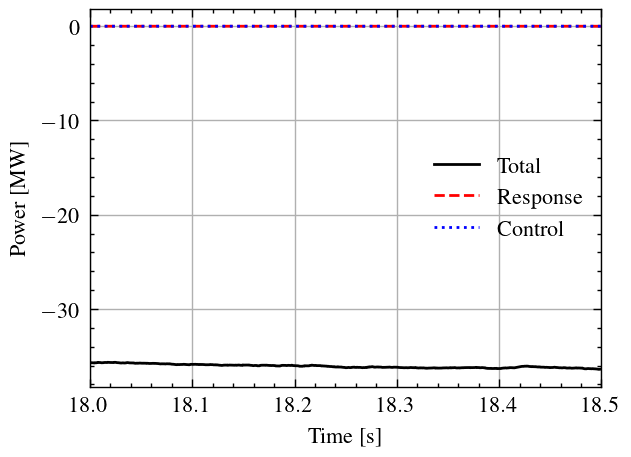

In [8]:
emcs.plot(style=['science', 'ieee'], dpi=200)